In [259]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plｔ
# jupyter notebook上で画像を表示するためのおまじない
%matplotlib inline

In [238]:
from keras.preprocessing import image
# 画像の読み込み
img = image.load_img('./basketball.png', target_size=(224, 224))
# PIL形式からnumpy形式に変換
x = image.img_to_array(img).astype('int16')
# (height, width, channel) -> (minibatch, height, width, channel)
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


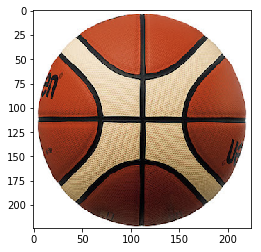

In [239]:
plt.imshow(x[0])

In [261]:
# convolution layerを用意
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3), input_shape=(224, 224, 3))
])

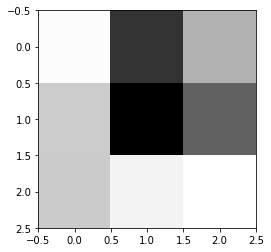

In [262]:
# ランダムに初期化されたfilterの可視化
plt.imshow(np.squeeze(model.layers[0].get_weights()[0])[0], cmap='gray')

In [263]:
# ちなみにbias termはリストのindex==1に格納されています
model.layers[0].get_weights()[1]

<class 'list'>


In [244]:
# 左側が明るくて右側が暗いエッジを検出するフィルター
w1 = np.array([[[1], [2], [1]],
              [[0], [0], [0]],
              [[-1], [-2], [-1]]],
              dtype='float32') 
# 簡単のためRGBチャンネル全て同じフィルターとする
w1 = np.array([w1, w1, w1])
# バイアス項は0
b = np.array([0], dtype='float32')

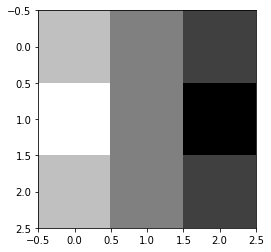

In [256]:
# 先ほど用意したconvolution layerにフィルターをセット
model.layers[0].set_weights([w1, b])
# フィルターの可視化
plt.imshow(np.squeeze(model.layers[0].get_weights()[0])[0].T, cmap='gray')

In [246]:
filtered = model.predict(x)

In [247]:
filtered /= np.max(filtered)

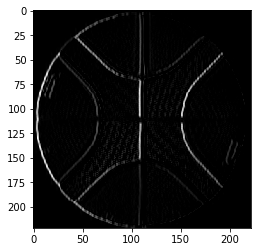

In [248]:
#plt.imshow(filtered[0], cmap='gray', vmin=0, vmax=255)
plt.imshow(np.squeeze(filtered), cmap='gray', vmin=0, vmax=1)

In [249]:
w2 = np.array([[[-1], [-2], [-1]],
              [[0], [0], [0]],
              [[1], [2], [1]]],
              dtype='float32')
w2 = np.array([w2, w2, w2])
b = np.array([0], dtype='float32')

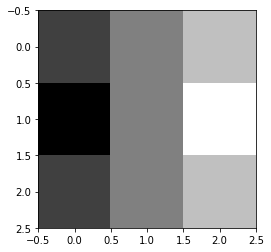

In [257]:
model.layers[0].set_weights([w2, b])
plt.imshow(np.squeeze(model.layers[0].get_weights()[0])[0].T, cmap='gray')

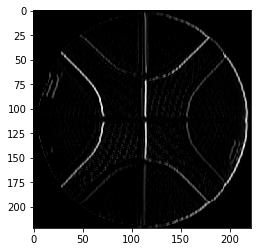

In [251]:
filtered = model.predict(x)
filtered /= np.max(filtered)
#plt.imshow(filtered[0], cmap='gray', vmin=0, vmax=255)
plt.imshow(np.squeeze(filtered), cmap='gray', vmin=0, vmax=1)

In [252]:
w3 = np.array([[[-1], [0], [1]],
              [[-2], [0], [2]],
              [[-1], [0], [1]]],
              dtype='float32')
w3 = np.array([w3, w3, w3])
b = np.array([0], dtype='float32')

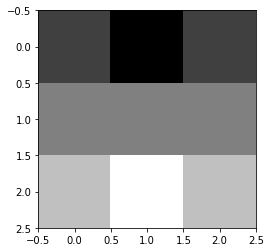

In [258]:
model.layers[0].set_weights([w3, b])
plt.imshow(np.squeeze(model.layers[0].get_weights()[0])[0].T, cmap='gray')

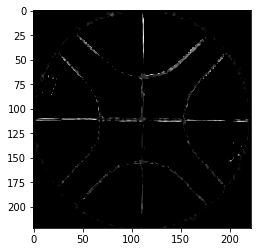

In [254]:
filtered = model.predict(x)
filtered /= np.max(filtered)
#plt.imshow(filtered[0], cmap='gray', vmin=0, vmax=255)
plt.imshow(np.squeeze(filtered), cmap='gray', vmin=0, vmax=1)